<br/>

#**MOVIE RECOMMENDATION SYSTEM**
## **Machine Learning and Data Analytics Mid Semester Project**
<br/>

Team Members: 
1. Sravya Gadamsetty (18CS02005) 
2. Kadukuntla Poornima (18CS01024)

<br/>



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip '/content/drive/MyDrive/ml-latest-small.zip'

Archive:  /content/drive/MyDrive/ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


Import Libraries for Statistical Analysis

In [4]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=9a41521990d587dbedb9e4d3566311cbdbc21e5a5b1fab7e37f1f8e842abba31
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [41]:
import random
import pandas as pd
import numpy as np

## Creating a dataframe


In [6]:
rating_data = pd.read_csv('/content/ml-latest-small/ratings.csv')
movies_data = pd.read_csv('/content/ml-latest-small/movies.csv', index_col='movieId')
tags_data = pd.read_csv('/content/ml-latest-small/tags.csv')


In [7]:
len(movies_data)

9742

In [8]:
rating_data.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [9]:
movies_data.tail(10)

,title,genres
movieId,,
193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
193571,Silver Spoon (2014),Comedy|Drama
193573,Love Live! The School Idol Movie (2015),Animation
193579,Jon Stewart Has Left the Building (2015),Documentary
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama
193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [10]:
tags_data.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


## Data Cleaning

### Check for null or nan values in cloumns

In [11]:
rating_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
rating_data.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
movies_data.isnull().sum()

title     0
genres    0
dtype: int64

In [14]:
movies_data.isna().sum()

title     0
genres    0
dtype: int64

In [15]:
tags_data.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [16]:
tags_data.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

As we can see that there are no NULL or Nan values, we didn't require to do any data cleaning process.

## Pre-processing of dataframes

User-Movies Data

In [17]:
User_movie_data = rating_data.pivot(index='userId', columns='movieId', values='rating')
User_movie_data.fillna(value=0, inplace=True)

In [18]:
User_movie_data

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.5,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,4.5,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,2.0,0.0,3.5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.5,3.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The movies_data has it's genres are pipe separated, we need in form of a one hot encoder.

In [19]:
genre_list = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','(no genres listed)']

def preprocess_movies_data(data):
  data1 = []
  for idx in data.index:
    for name in data['genres'][idx].split('|'):
      data1.append([idx, name])
  data1 = pd.DataFrame(data=data1, columns=['movieId', 'genre'])
  return data1

In [20]:
unfolded_movies_data  = preprocess_movies_data(movies_data)

In [21]:
unfolded_movies_data

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
...,...,...
22079,193583,Fantasy
22080,193585,Drama
22081,193587,Action
22082,193587,Animation


In [22]:
#Interests or genres of the user
list_genres = []
for idx in range(611):
  empty_set = set()
  list_genres.append([idx, empty_set])

for idx in rating_data.index:
  g_l_temp = movies_data['genres'][rating_data['movieId'][idx]].split('|')
  for item in g_l_temp:
    list_genres[rating_data['userId'][idx]][1].add(item)

user_genre_data = pd.DataFrame(data=list_genres[1:], columns=['userId', 'genreSet'])

In [23]:
user_genre_data.head()

,userId,genreSet
0,1,"{Romance, Action, Children, War, Film-Noir, Cr..."
1,2,"{Documentary, Romance, Action, War, IMAX, Crim..."
2,3,"{Romance, Action, War, Children, Crime, Drama,..."
3,4,"{Documentary, War, Adventure, Fantasy, Comedy,..."
4,5,"{Romance, Action, Children, War, IMAX, Crime, ..."


## Data Analysis

###  Apriori Algorithm based recommendation system

In [ ]:
genre_interest_list = []

for idx in user_genre_data.index:
  genre_interest_list.append(list(user_genre_data['genreSet'][idx]))

In [ ]:
from apyori import apriori

apriori_rules = apriori(genre_interest_list[:3], min_support = 0.3, min_confidence = 0.2, min_lift = 3, min_length = 2)
apriori_results = pd.DataFrame(list(apriori_rules))

In [ ]:
list(apriori_rules)

### Correlation based prediction

This gives is user to user correlation based on the movies watched by them.

In [24]:
movies_user_data = User_movie_data.transpose()
corr_with_users = movies_user_data.corr()

In [25]:
corr_with_users

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.019400,0.053056,0.176920,0.120866,0.104418,0.143793,0.128547,0.055268,-0.000298,0.122323,0.007960,0.085803,0.104457,0.146283,0.157364,0.252953,0.187725,0.300040,0.141389,0.126253,0.036855,0.091566,0.141627,0.092625,0.100118,0.225827,0.174090,0.133656,0.092081,0.156080,0.133226,0.135969,0.071351,0.068152,0.061368,0.139595,0.127586,0.320120,0.081012,...,0.076683,0.114652,0.233626,0.087359,0.054737,0.046064,0.304202,-0.007817,0.130296,0.225740,0.048369,0.038085,0.041564,0.088216,0.103667,0.103559,0.105562,0.175445,0.110124,0.298475,0.127919,0.131652,0.162223,0.122497,0.105116,0.096131,0.291054,0.004857,0.241534,0.263481,0.066256,0.149942,0.186978,0.056530,0.134412,0.121981,0.254200,0.262241,0.085434,0.098719
2,0.019400,1.000000,-0.002594,-0.003804,0.013183,0.016257,0.021567,0.023750,-0.003448,0.061880,0.040383,-0.003041,0.041117,0.013346,0.114666,0.088977,0.098900,0.158508,-0.001030,0.006179,0.081791,0.140386,0.007765,0.125141,0.223866,-0.002451,-0.006093,0.046978,0.099785,0.146642,-0.003736,0.012534,0.026120,0.038819,-0.002552,0.050279,0.026132,0.018681,-0.005285,0.012210,...,-0.005245,0.026354,0.161412,0.033077,-0.003059,-0.002230,0.008246,-0.002727,-0.004535,0.052241,0.133752,0.216222,0.039837,-0.004805,0.123907,0.082799,-0.006863,0.052246,0.023167,0.043761,0.032507,0.025763,0.057158,0.005373,-0.002390,0.095872,0.000955,0.046332,0.082509,0.009476,0.198549,0.010888,-0.004030,-0.005345,-0.007919,0.011299,0.005813,0.032730,0.024373,0.089329
3,0.053056,-0.002594,1.000000,-0.004556,0.001887,-0.004577,-0.005634,0.001703,-0.003111,-0.005501,-0.003824,-0.002743,-0.002644,-0.000189,0.011930,0.027669,0.004859,0.017891,0.007140,0.001523,-0.005974,-0.001527,-0.002251,-0.002509,0.002615,-0.002212,-0.003148,0.019006,0.001631,-0.002847,0.000150,0.010729,0.001264,-0.003509,-0.002303,-0.003570,-0.002200,0.000081,-0.001108,-0.002279,...,0.016291,0.002158,-0.008390,-0.002296,-0.002760,0.027879,0.034155,-0.002460,0.001685,0.023832,0.005497,-0.003632,-0.003577,-0.004335,-0.003810,-0.006082,0.009749,0.000437,0.001782,0.015148,-0.003412,-0.004604,0.001751,-0.005133,-0.002156,0.016483,0.019437,-0.002066,0.018550,0.000416,0.000150,-0.000585,0.011211,-0.004822,0.003678,-0.003246,0.012885,0.008096,-0.002963,0.015962
4,0.176920,-0.003804,-0.004556,1.000000,0.121018,0.065719,0.100602,0.054235,0.002417,0.015615,0.044320,0.042513,0.070111,0.040059,0.056804,0.153127,0.132635,0.095222,0.178130,0.094761,0.025259,0.030562,0.079852,0.057863,0.025941,0.056055,0.115024,0.106839,0.049399,0.050508,0.117905,0.189416,0.152799,0.033798,0.043981,0.104827,0.055277,0.079278,0.230626,0.040150,...,0.005013,0.168649,0.104275,0.058571,0.053684,0.000124,0.154665,-0.007181,0.088171,0.123962,0.035373,0.037623,0.038646,0.029166,0.078319,0.044753,0.123212,0.039545,0.056425,0.190823,0.107595,0.055743,0.206465,0.063496,0.086684,0.082179,0.254500,0.010196,0.154673,0.183269,0.072848,0.114287,0.281866,0.039699,0.065493,0.164831,0.115118,0.116861,0.023930,0.062523
5,0.120866,0.013183,0.001887,0.121018,1.000000,0.294138,0.101725,0.426576,-0.004185,0.023471,0.179624,0.055388,0.013661,0.218294,0.103749,0.076257,0.157100,0.109778,0.085258,0.087905,0.046076,0.027086,0.060235,0.090070,0.037485,0.292237,0.093956,0.109967,0.063418,0.061957,0.064362,0.229066,0.277044,0.024416,0.309387,0.017368,0.301073,0.374389,0.147607,0.316861,...,0.013787,0.117988,0.120258,0.339365,0.045777,-0.002707,0.115218,-0.003310,0.177915,0.106447,0.053618,-0.004887,0.120437,0.344517,0.024320,0.064117,0.147572,0.374333,0.227833,0.141074,-0.004591,0.355790,0.166667,0.130174,0.070564,0.085002,0.105146,-0.002780,0.076954,0.124588,0.061912,0.414931

Now, we will suggest any particular user with the movies, he correlates the most.

In [26]:
# Find out which to which user, 'user' correlates the most
import sys
user = 3
user_601_corr = list(corr_with_users[user])
max_el = -2
sim_user = user
for idx, value in enumerate(user_601_corr):
  if value != 1 and max_el<value:
    max_el = value
    sim_user = idx + 1


In [27]:
# Find all the movies liked by user in sim_user. Movies liked => movie ratings above 3

list_movies_liked = []

for idx, val in enumerate(User_movie_data.loc[sim_user]):
  if val >=3:
    list_movies_liked.append(idx+1)

print("The following are the "+str(len(list_movies_liked))+" movies which the user might like:")

for item in list_movies_liked:
  if(movies_data['title'].get(item) is not None):
    print(movies_data['title'].get(item))

The following are the 262 movies which the user might like:
Heat (1995)
GoldenEye (1995)
City of Lost Children, The (Cité des enfants perdus, La) (1995)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Dead Man Walking (1995)
Mortal Kombat (1995)
Seven (a.k.a. Se7en) (1995)
Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)
Man of the Year (1995)
Congo (1995)
Scarlet Letter, The (1995)
Boys on the Side (1995)
Disclosure (1994)
Jerky Boys, The (1995)
Kid in King Arthur's Court, A (1995)
Milk Money (1994)
Miami Rhapsody (1995)
Poison Ivy II (1996)
Stuart Saves His Family (1995)
Virtuosity (1995)
Corrina, Corrina (1994)
S.F.W. (1994)
Airheads (1994)
Beverly Hillbillies, The (1993)
Fearless (1993)
Free Willy (1993)
In the Name of the Father (1993)
Philadelphia (1993)
Poetic Justice (1993)
Program, The (1993)
Romeo Is Bleeding (1993)
Ruby in Paradise (1993)
Pinocchio (1940)
Aristocats, The (1970)
Fear (1996)
True Crime (1996)
Mulholland Falls (1996)
Thinner (1996)
Phan

### K Means based recommendation system

Cluster the movies based on their genres

In [77]:
data = unfolded_movies_data.groupby(by='movieId').size().reset_index(name='counts')
data.head(20)
genre_list_dict = {'Action': 00,
              'Adventure': 1,
              'Animation': 2,
              'Children': 3,
              'Comedy': 4,
              'Crime': 5,
              'Documentary': 6,
              'Drama': 7,
              'Fantasy': 8,
              'Film-Noir': 9,
              'Horror': 10,
              'IMAX': 11,
              'Musical': 12,
              'Mystery': 13,
              'Romance': 14,
              'Sci-Fi': 15,
              'Thriller': 16,
              'War': 17,
              'Western': 18,
              '(no genres listed)': 19
              }

movies_top_3_genre_dataset = []
for idx in movies_data.index:
  top_3_genres = [idx]
  genre_i_list = list(movies_data['genres'][idx].split('|'))
  random.shuffle(genre_i_list)
  # print(genre_i_list)
  for item in genre_i_list:
    if len(top_3_genres)<4:
      top_3_genres.append(genre_list_dict[item])
  for i in range(4-len(top_3_genres)):
    top_3_genres.append(genre_list_dict['(no genres listed)'])
  movies_top_3_genre_dataset.append(top_3_genres)

movies_top_3_genre_dataset = pd.DataFrame(movies_top_3_genre_dataset, columns=['movieId', 'G1', 'G2', 'G3'])
  

In [78]:
movies_top_3_genre_dataset.head()

,movieId,G1,G2,G3
0,1,8,1,3
1,2,3,1,8
2,3,14,4,19
3,4,7,14,4
4,5,4,19,19


In [80]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="k-means++", n_clusters=8)
kmeans.fit(movies_top_3_genre_dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
for i in range(8):
    print("Cluster %d: " % i) 
    for ind in order_centroids[i, :]:
      for key, value in genre_list_dict.items():
         if ind == value:
             print(key)

Top terms per cluster:
Cluster 0: 
Action
Children
Animation
Adventure
Cluster 1: 
Action
Children
Animation
Adventure
Cluster 2: 
Action
Children
Animation
Adventure
Cluster 3: 
Action
Children
Animation
Adventure
Cluster 4: 
Action
Children
Animation
Adventure
Cluster 5: 
Action
Children
Animation
Adventure
Cluster 6: 
Action
Children
Animation
Adventure
Cluster 7: 
Action
Children
Animation
Adventure


## Data Visualisation

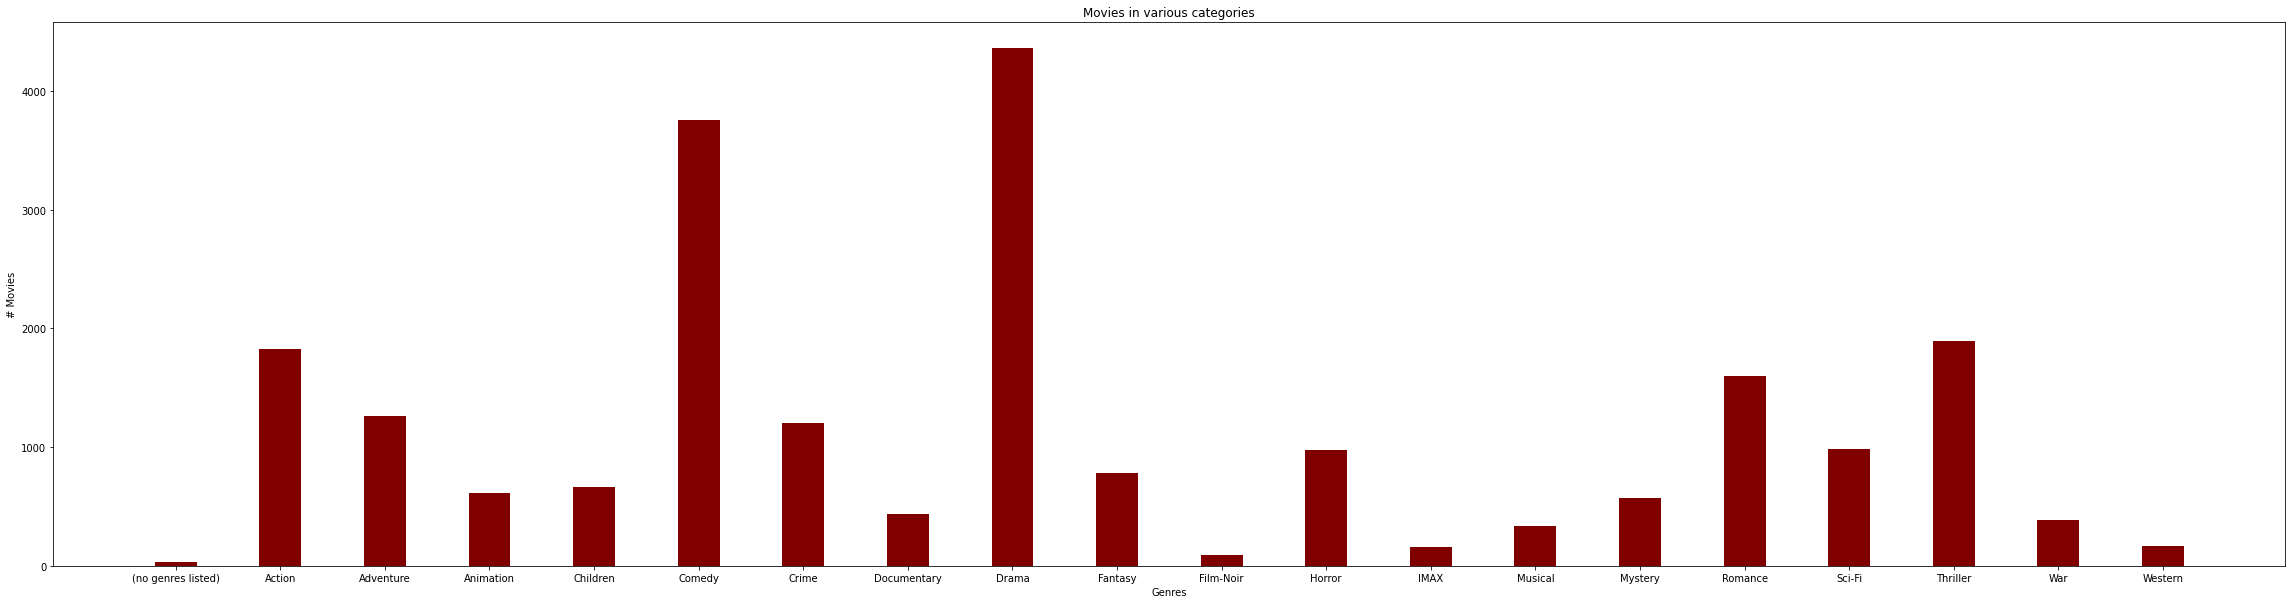

In [28]:
import numpy as np
import matplotlib.pyplot as plt
 

fig = plt.figure(figsize = (40, 10))
data = unfolded_movies_data.groupby(by='genre').size().reset_index(name='counts')

# creating the bar plot
plt.bar(x = data['genre'], height=data['counts'], color ='maroon',width = 0.4, )
 
plt.xlabel("Genres")
plt.ylabel("# Movies")
plt.title("Movies in various categories")
plt.show()

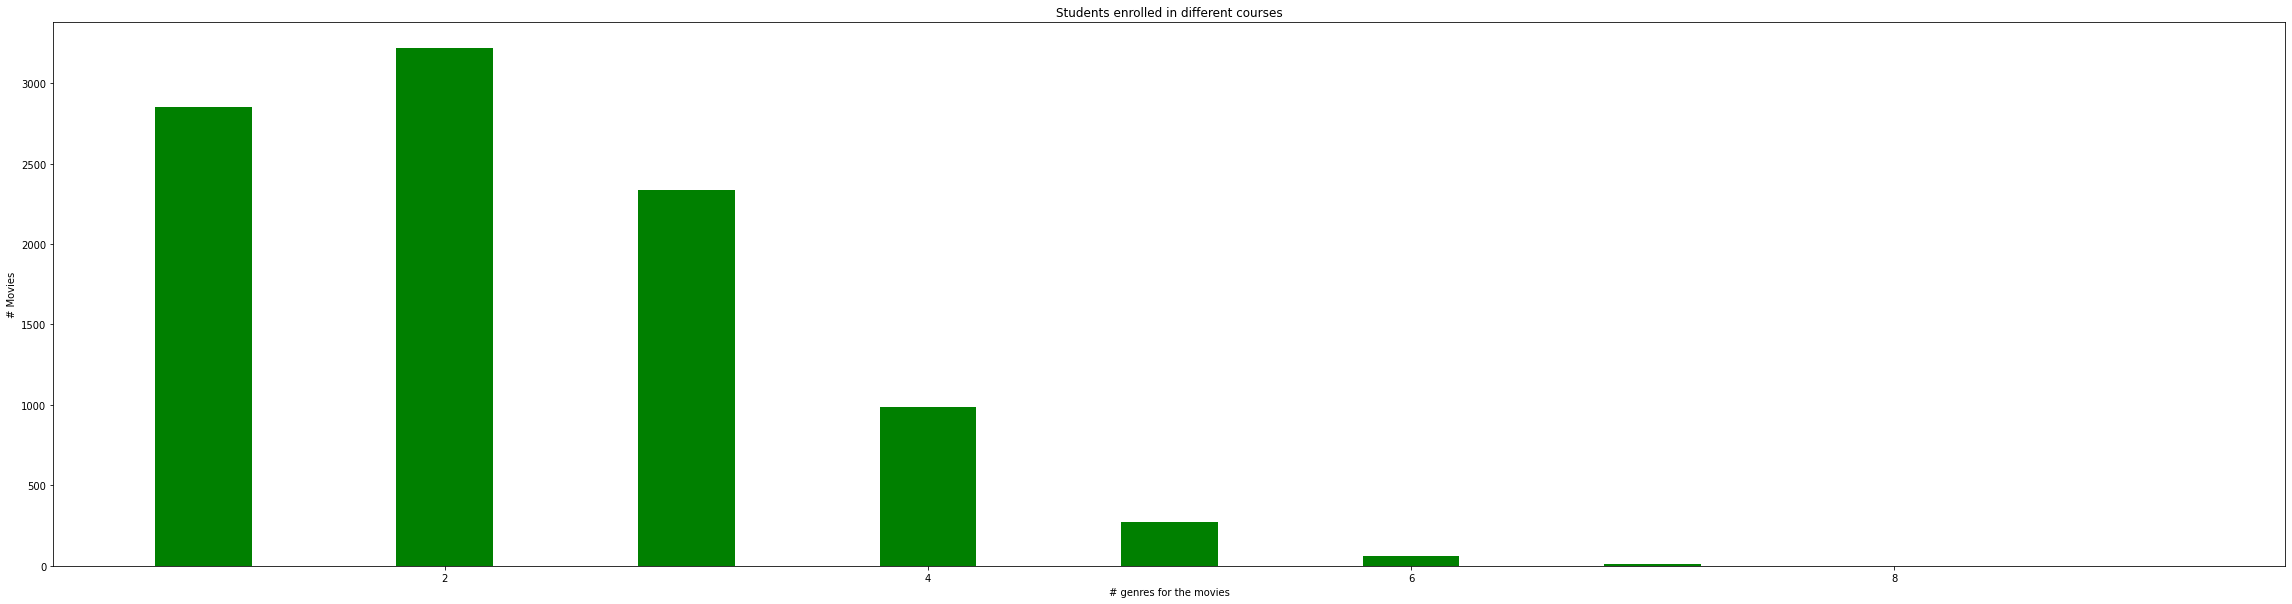

In [29]:
import numpy as np
import matplotlib.pyplot as plt
 

fig = plt.figure(figsize = (40, 10))
data = unfolded_movies_data.groupby(by='movieId').size().reset_index(name='counts')
data = data.groupby(by='counts').size()
d = []
for i in data.index:
  d.append(data[i])
# creating the bar plot
plt.bar(x = range(1, 10), height=d, color ='green',width = 0.4 )

plt.xlabel("# genres for the movies")
plt.ylabel("# Movies")
plt.title("Students enrolled in different courses")
plt.show()

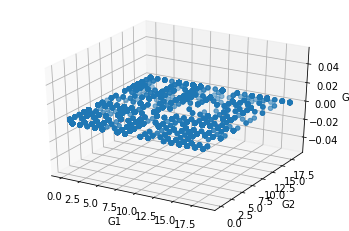

In [53]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = movies_top_3_genre_dataset['G1']
y = movies_top_3_genre_dataset['G2']
z = movies_top_3_genre_dataset['G3']

ax.set_xlabel("G1")
ax.set_ylabel("G2")
ax.set_zlabel("G3")

ax.scatter(x, y)

plt.show()

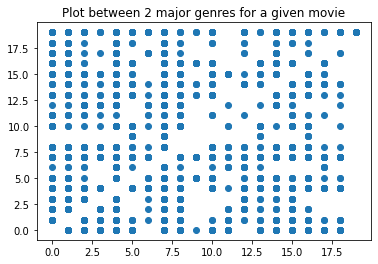

In [82]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

x = movies_top_3_genre_dataset['G1']
y = movies_top_3_genre_dataset['G2']

plt.scatter(x, y)
plt.title("Plot between 2 major genres for a given movie")
plt.show()